(smart1)=
# SMART - Notebook 1
## General information about this notebook

This notebook series has been initiated by the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author(s) of this notebook:
 - *Johannes Röttenbacher*, [*Leipzig Institute for Meteorology*](*https://www.physgeo.uni-leipzig.de/institut-fuer-meteorologie*), *Stephanstraße 3, 04103 Leipzig*, *johannes.roettenbacher@uni-leipzig.de*

Github repository: https://github.com/ac3-tr/ac3-notebooks

This notebook is licensed under the [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")

# Dataset description

**Title: Aircraft measurements of spectral downward solar irradiance over Arctic sea ice and ocean during the HALO-(AC)³ campaign in spring 2022**

**Authors:** Röttenbacher, Johannes; Ehrlich, André; Schäfer, Michael; Kirbus, Benjamin; Luebke, Anna E; Wendisch, Manfred

**Description:** During the HALO-(AC)³ campaign in March and April 2022 spectral solar downward irradiances were measured onboard of the High Altitude LOng range research aircraft (HALO) over the Arctic sea ice and ocean using the Spectral Modular Airborne Radiation measurement sysTem (SMART). The data set gives time series of spectral irradiances measured along the flight path of HALO on 17 days. All flights started from Kiruna, Sweden and headed into the Fram Straight and towards the central Arctic. The goal of the campaign was to study warm air intrusions and cold air outbreaks to and from the Arctic and to follow those air masses over several days with remote sensing instrumentation aboard HALO. The first research flight (RF) was RF02. RF01 was the transfer flight from Oberpfaffenhofen, Germany to Kiruna. The irradiance inlet of SMART was actively stabilized and connected to two spectrometers of which one measured radiation in the visible to near infrared range (VNIR) between 180 and 1014 nm and the other radiation in the shortwave to infrared range (SWIR) between 890 and 2200 nm. The data was merged at 990 nm and cut to 320 to 2100 nm because of high uncertainties at the spectrometer edges. The spectral resolution below 900 nm is 1nm and above 5 nm due to technical limitations of the SWIR spectrometer. The data is corrected for the dark current of the spectrometers and calibrated using in field transfer calibrations connected to a laboratory calibration after the campaign.

**Year: 2023**

**Institutes:** Leipzig Institute for Meteorology, Deutsches Zentrum für Luft- und Raumfahrt (DLR)

**DOI:** https://doi.org/10.1594/PANGAEA.956151

**License**    [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")

## Contents of this notebook

Read in calibrated SMART data, plot it on a map and compare to a clear sky simulation provided within the dataset.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pangaeapy as pgp
import xarray as xr
# needed for parallel download of data
import nest_asyncio
nest_asyncio.apply()

# Research Flight 17 - 2022-04-11

In [3]:
# data from PANGAEA (saved to local cache defined in "~/.config/pangaeapy/config.toml"
# Experimental using the dev branch of pangaeapy
ds = pgp.PanDataSet(956151, enable_cache=True)
filenames = ds.download(interactive=False, indices=[15], columns=['Binary'])

[INFO] Cache directory set to: E:\tmp\pangaeapy_cache
[INFO] To change the cache directory permanently, edit: C:\Users\Johannes\.config\pangaeapy\config.toml
Available files
                                               Binary  \
0   HALO-AC3_HALO_SMART_spectral-irradiance-Fdw_20...   
1   HALO-AC3_HALO_SMART_spectral-irradiance-Fdw_20...   
2   HALO-AC3_HALO_SMART_spectral-irradiance-Fdw_20...   
3   HALO-AC3_HALO_SMART_spectral-irradiance-Fdw_20...   
4   HALO-AC3_HALO_SMART_spectral-irradiance-Fdw_20...   
5   HALO-AC3_HALO_SMART_spectral-irradiance-Fdw_20...   
6   HALO-AC3_HALO_SMART_spectral-irradiance-Fdw_20...   
7   HALO-AC3_HALO_SMART_spectral-irradiance-Fdw_20...   
8   HALO-AC3_HALO_SMART_spectral-irradiance-Fdw_20...   
9   HALO-AC3_HALO_SMART_spectral-irradiance-Fdw_20...   
10  HALO-AC3_HALO_SMART_spectral-irradiance-Fdw_20...   
11  HALO-AC3_HALO_SMART_spectral-irradiance-Fdw_20...   
12  HALO-AC3_HALO_SMART_spectral-irradiance-Fdw_20...   
13  HALO-AC3_HALO_SMART_spec

In [4]:
ds = xr.open_dataset(filenames[0])
ds

<xarray.Dataset> Size: 1GB
Dimensions:             (time: 27169, wavelength: 893)
Coordinates:
  * time                (time) datetime64[ns] 217kB 2022-04-11T07:55:50 ... 2...
  * wavelength          (wavelength) int32 4kB 320 321 322 ... 2090 2095 2100
Data variables: (12/22)
    counts              (time, wavelength) float64 194MB ...
    Fdw                 (time, wavelength) float64 194MB ...
    c_field             (wavelength) float64 7kB ...
    sza                 (time) float64 217kB ...
    saa                 (time) float64 217kB ...
    k_cos_diff          (wavelength) float64 7kB ...
    ...                  ...
    v_up                (time) float64 217kB ...
    vel                 (time) float64 217kB ...
    roll                (time) float64 217kB ...
    pitch               (time) float64 217kB ...
    yaw                 (time) float64 217kB ...
    Fdw_simulated       (time, wavelength) float64 194MB ...
Attributes: (12/14)
    title:           Spectral irradiance measured by SMART
    project:         (AC)³ and SPP 1294 HALO
    mission:         HALO-(AC)³
    ongoing_subset:  RF17
    platform:        HALO
    instrument:      Spectral Modular Airborne Radiation measurement sysTem (...
    ...              ...
    institution:     Leipzig Institute for Meteorology, Leipzig, Germany
    date_created:    Tue Jan  3 16:10:23 2023 UTC
    history:         created Tue Jan  3 16:10:23 2023 UTC
    contact:         Johannes Röttenbacher, johannes.roettenbacher@uni-leipzi...
    PI:              André Ehrlich, a.ehrlich@uni-leipzig.de
    Conventions:     CF-1.8

In [5]:
ds['Fdw_int'] = ds.Fdw_cor.integrate('wavelength')
ds['Fdw_sim_int'] = ds.Fdw_simulated.integrate('wavelength')

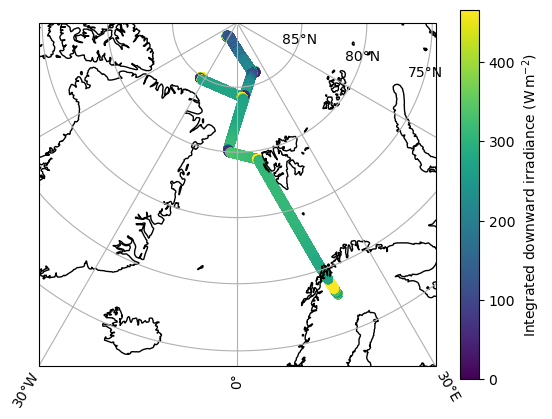

In [8]:
import cartopy.crs as ccrs
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.NorthPolarStereo()))
ax.set_extent([-30, 30, 60, 90])
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
# scale the colorbar only to the 90th percentile to exclude outliers
vmax = np.percentile(ds.Fdw_int[~np.isnan(ds.Fdw_int)], 90)
fwd = ax.scatter(ds.lon, ds.lat, c=ds.Fdw_int, transform=ccrs.Geodetic(), vmin=0, vmax=vmax)
fig.colorbar(fwd, ax=ax, label='Integrated downward irradiance (W$\\,$m$^{-2}$)')
plt.show()

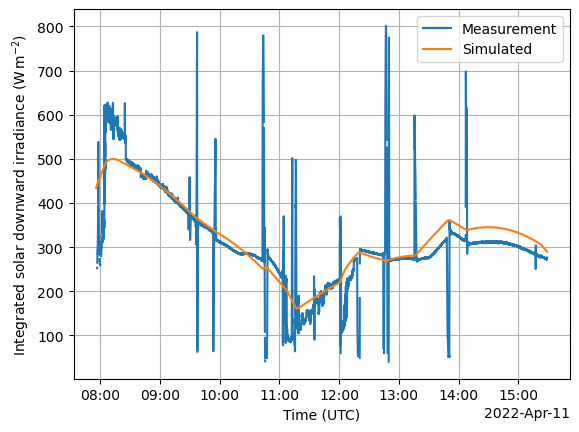

In [9]:
_, ax = plt.subplots()
ds['Fdw_int'].plot(x='time', ax=ax, label='Measurement')
ds['Fdw_sim_int'].plot(x='time', ax=ax, label='Simulated')
ax.legend()
ax.grid()
ax.set(
    ylabel='Integrated solar downward irradiance (W$\\,$m$^{-2}$)',
    xlabel='Time (UTC)',
)
plt.show()

There is a stabilization flag in the data, which should help us filter out the unnatural peaks in the measurement data.

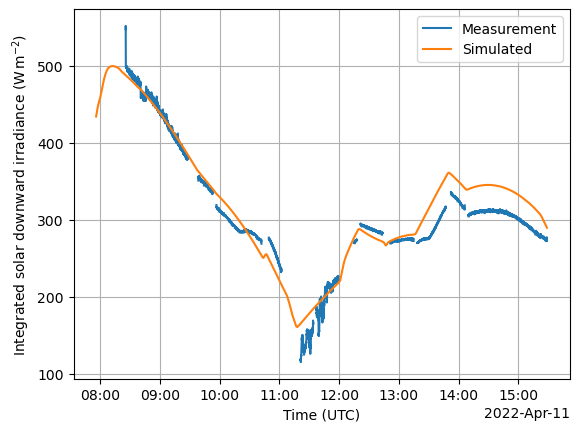

In [10]:
_, ax = plt.subplots()
ds['Fdw_int'].where(ds['stabilization_flag'] == 0).plot(x='time', ax=ax, label='Measurement')
ds['Fdw_sim_int'].plot(x='time', ax=ax, label='Simulated')
ax.legend()
ax.grid()
ax.set(
    ylabel='Integrated solar downward irradiance (W$\\,$m$^{-2}$)',
    xlabel='Time (UTC)',
)
plt.show()